In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [9]:
data = pd.read_csv('spy dal 2022.csv', index_col=0, parse_dates=True, sep=',')

data["momentum"] = data["close"].pct_change(60)
data["volatility"] = data["close"].pct_change(60).rolling(60).std()
data["returns"] = data["close"]


<Axes: xlabel='timestamp'>

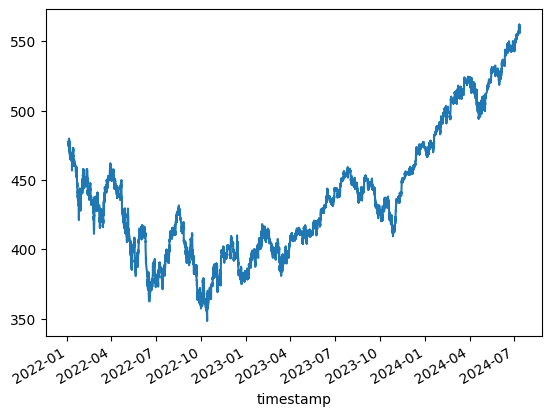

In [10]:
data["close"].plot()

In [11]:
data["tomorrow_momentum"] = data["momentum"].shift(-1)
data["Y"] = (data["tomorrow_momentum"] > data["momentum"]).astype(int)

### Split into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split    
X = data.drop(["Y", "tomorrow_momentum", "close", "open", "high", "low"], axis=1)  
Y = data["Y"]  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Training the model

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, min_samples_split=5, random_state=1)
model.fit(X_train, Y_train)

Y_pred_proba = model.predict_proba(X_test)
Y_pred = (Y_pred_proba[:,1] >= 0.8).astype(int) 


### Metrics

In [15]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_pred)
print(precision)

0.5186935969058875


In [16]:
combined = pd.DataFrame({'Y_pred': Y_pred, 'Y_test': Y_test})


### Create a function

### Hyperparameters

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definisci il modello
model = RandomForestClassifier(random_state=1)

# Definisci la griglia di iperparametri da testare
param_grid = {
    'n_estimators': [1, 2, 3, 4, 5],
    'min_samples_split': [1, 2, 3, 4, 5 ]
}

# Crea l'oggetto GridSearchCV
grid = GridSearchCV(model, param_grid, refit=True, verbose=3)

# Allena il modello
grid.fit(X_train, Y_train)

# Puoi trovare i migliori parametri così
print(grid.best_params_)

# Esegui la previsione utilizzando il modello con i migliori iperparametri
Y_pred = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .min_samples_split=1, n_estimators=1;, score=nan total time=   0.0s
[CV 2/5] END .min_samples_split=1, n_estimators=1;, score=nan total time=   0.0s
[CV 3/5] END .min_samples_split=1, n_estimators=1;, score=nan total time=   0.0s
[CV 4/5] END .min_samples_split=1, n_estimators=1;, score=nan total time=   0.0s
[CV 5/5] END .min_samples_split=1, n_estimators=1;, score=nan total time=   0.0s
[CV 1/5] END .min_samples_split=1, n_estimators=2;, score=nan total time=   0.0s
[CV 2/5] END .min_samples_split=1, n_estimators=2;, score=nan total time=   0.0s
[CV 3/5] END .min_samples_split=1, n_estimators=2;, score=nan total time=   0.0s
[CV 4/5] END .min_samples_split=1, n_estimators=2;, score=nan total time=   0.0s
[CV 5/5] END .min_samples_split=1, n_estimators=2;, score=nan total time=   0.0s
[CV 1/5] END .min_samples_split=1, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END .min_samples_split=1, n_estimators

/Users/letizialibrobuono/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/letizialibrobuono/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/letizialibrobuono/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/letizialibrobuono/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, i

{'min_samples_split': 3, 'n_estimators': 5}


In [30]:
import pandas as pd

# Converti i risultati in un DataFrame
results = pd.DataFrame(grid.cv_results_)

# Mostra il DataFrame
print(results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.029517      0.007748         0.000000        0.000000   
1        0.018453      0.009947         0.000000        0.000000   
2        0.012023      0.001680         0.000000        0.000000   
3        0.010640      0.000886         0.000000        0.000000   
4        0.012693      0.001742         0.000000        0.000000   
5        1.786591      0.358053         0.035054        0.004966   
6        2.883581      0.668607         0.054179        0.003820   
7        4.407679      0.486999         0.087346        0.020144   
8        4.823708      0.409165         0.097204        0.009974   
9        6.042975      0.510080         0.122557        0.007953   
10       1.352657      0.140359         0.037217        0.011663   
11       2.510032      0.245018         0.050407        0.003555   
12       3.681251      0.383731         0.069167        0.002258   
13       4.933050      0.171559         0.091148

In [31]:
import plotly.express as px

# Crea il grafico 3D interattivo
fig = px.scatter_3d(results, x='param_n_estimators', y='param_min_samples_split', z='mean_test_score', color='mean_test_score')

# Mostra il grafico
fig.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=10, min_samples_split=20, random_state=1)
model.fit(X_train, Y_train)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame to visualize the importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the DataFrame

# Stampa il DataFrame
print(feature_importances)

      feature  importance
1    momentum    0.257769
2  volatility    0.250235
0      volume    0.246104
3     returns    0.245892


<Axes: xlabel='momentum', ylabel='tomorrow_volatility'>

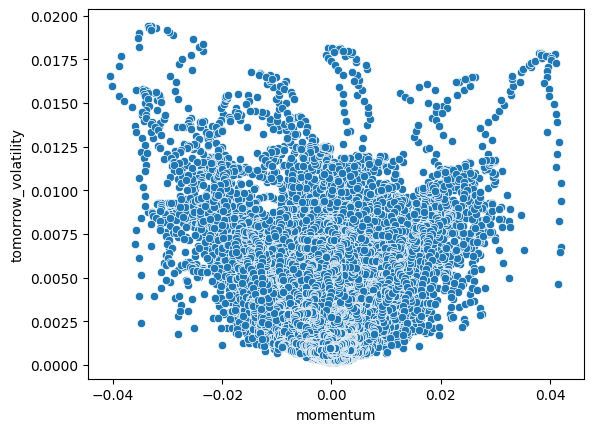

In [ ]:
sns.scatterplot(x='momentum', y='tomorrow_volatility', data=data)